In [1]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 319, in run
    reqs, check_supported_wheels=not options.target_dir
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 128, in resolve
    requirements, max_rounds=try_to_avoid_resolution_too_deep
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 473, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/resolvelib/resolv

In [2]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [3]:
!nvidia-smi

Thu Aug 18 02:15:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
%cd /content/drive/MyDrive/resnet/
!unzip -qq "/content/drive/MyDrive/resnet/data_final.zip"

/content/drive/MyDrive/resnet


## **1. 하이퍼 파라메터 설정** 

In [26]:
# HYPER-PARAMETER

# 150x150
IMG_SIZE = 150
CHANNELS = 3
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, CHANNELS)

CLASSES = 7

#학습에 관련된 파라메터
EPOCHS = 10
BATCH_SIZE = 50

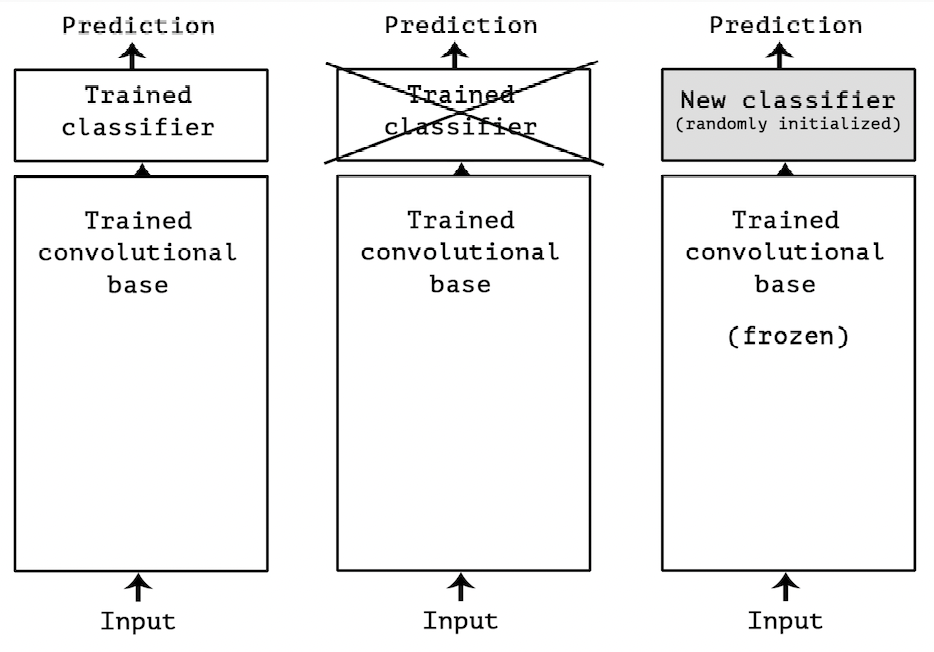

## **2. 모델 생성(불러오기)** 

In [27]:
from tensorflow.keras.applications import ResNet50V2

conv_base = ResNet50V2(weights='imagenet',
                       include_top=False,
                       input_shape=INPUT_SHAPE
                       )

In [28]:
conv_base.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 77, 77, 64)   0           ['conv1_conv[0][0]']    

In [30]:
# CNN(RestNet50v2) 구성

from tensorflow.keras import models, layers
from tensorflow.keras.layers import Flatten, Dense

model = models.Sequential()

# 1. 특징 추출기
model.add(conv_base)
# 2-1 구형 분류기 : 파라메터가 매우 많다.
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(CLASSES, activation='softmax'))

# 2-2 신형 분류기 : 파라메터가 적은 대신 본 데이터셋에서는 학습속도가 느렸다. 
# model.add(GlobalAveragePooling2D())
# model.add(Dropout(0.2))
# model.add(Dense(n_classes, activation = 'softmax'))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 5, 5, 2048)        23564800  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               13107456  
                                                                 
 dense_5 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 36,674,055
Trainable params: 36,628,615
Non-trainable params: 45,440
_________________________________________________________________


## **3. 데이터셋 가져오기** 

In [ ]:
# github에서 데이터셋을 다운로드 받기 위해 
# !git clone https://github.com/gilbutITbook/006975.git

Cloning into '006975'...
remote: Enumerating objects: 102534, done.
remote: Total 102534 (delta 0), reused 0 (delta 0), pack-reused 102534
Receiving objects: 100% (102534/102534), 202.75 MiB | 23.86 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Checking out files: 100% (104042/104042), done.


In [10]:
# 파일 경로 설정, 파일 복사
import os, shutil

# # 원본 데이터셋을 압축 해제한 디렉터리 경로
# original_dataset_dir = '/content/006975/datasets/cats_and_dogs/train'

# # 소규모 데이터셋을 저장할 디렉터리
# base_dir = '/content/006975/datasets/cats_and_dogs_small'

# if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
#     shutil.rmtree(base_dir)   # 폴더에 파일이 존재하더라도 폴더를 파일과함께 삭제하는 명령 
# os.mkdir(base_dir)

In [32]:
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validation')
# test_dir = os.path.join(base_dir, 'test')

# os.mkdir(train_dir)
# os.mkdir(validation_dir)
# os.mkdir(test_dir)

TRAIN_DATA_DIR = '/content/drive/MyDrive/resnet/train'
VALIDATION_DATA_DIR = '/content/drive/MyDrive/resnet/validation'
TEST_DATA_DIR = '/content/drive/MyDrive/resnet/test'

In [12]:
# # 훈련용 고양이 사진 디렉터리
# train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

# # 훈련용 강아지 사진 디렉터리
# train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

In [13]:
# # 검증용 고양이 사진 디렉터리
# validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

# # 검증용 강아지 사진 디렉터리
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

# # 테스트용 고양이 사진 디렉터리
# test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

# # 테스트용 강아지 사진 디렉터리
# test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

In [14]:
# # 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
# #['cat.0.jpg' ~ 'cat.999.jpg']
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

# # 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# # 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)

In [15]:
# # 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)
    
# # 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)
    
# # 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [33]:
print('훈련용 이미지 전체 개수:', len(os.listdir(TRAIN_DATA_DIR)))
print('검증용 이미지 전체 개수:', len(os.listdir(VALIDATION_DATA_DIR)))
print('테스트용 이미지 전체 개수:', len(os.listdir(TEST_DATA_DIR)))

훈련용 이미지 전체 개수: 7
검증용 이미지 전체 개수: 7
테스트용 이미지 전체 개수: 7


In [34]:
trainIMG_NUM = 7840
validIMG_NUM = 3366

In [35]:
trainIMG_NUM, validIMG_NUM

(7840, 3366)

In [36]:
print('conv_base를 frozen하기 전 훈련되는 가중치의 종류수:', 
      len(model.trainable_weights))

conv_base를 frozen하기 전 훈련되는 가중치의 종류수: 176


In [37]:
# conv_base부분의 가중치값은 학습시에 업데이트하지 않겠다.
conv_base.trainable = False

In [38]:
print('conv_base를 frozen한 뒤 훈련되는 가중치의 종류수:', 
      len(model.trainable_weights))

conv_base를 frozen한 뒤 훈련되는 가중치의 종류수: 4


## **4. 데이터 증식(Data Augmentation)**

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# data augmentation은 train 데이터에만 적용해야 한다!!!
train_datagen = ImageDataGenerator(
      # 정규화
      rescale=1./255,

      # Data Aug 조건
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
validation_datagen = ImageDataGenerator(rescale=1./255)

# flow_from_directory는 train_dir아래에 클래스 갯수만큼 폴더가 존재할때 사용 
train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        TRAIN_DATA_DIR,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        # categorical_crossentropy 손실을 사용하므로 다중 레이블이 필요합니다
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DATA_DIR,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 7840 images belonging to 7 classes.
Found 3366 images belonging to 7 classes.


## **5. 학습 조건 설정**  

In [40]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(learning_rate=2e-5),
              metrics=['acc'])

## **6. 학습**

In [41]:
history = model.fit(
      train_generator,  # X, Y
      steps_per_epoch = trainIMG_NUM/BATCH_SIZE, #2000 -> Train(cats+dogs) 이미지의 갯수
      batch_size = BATCH_SIZE,
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=validIMG_NUM/BATCH_SIZE)

Epoch 1/10
156/156 [==============================] - 83s 472ms/step - loss: 0.6221 - acc: 0.7995 - val_loss: 0.2236 - val_acc: 0.9236
Epoch 2/10
156/156 [==============================] - 71s 455ms/step - loss: 0.2521 - acc: 0.9177 - val_loss: 0.1135 - val_acc: 0.9635
Epoch 3/10
156/156 [==============================] - 75s 480ms/step - loss: 0.1889 - acc: 0.9358 - val_loss: 0.0991 - val_acc: 0.9700
Epoch 4/10
156/156 [==============================] - 72s 457ms/step - loss: 0.1487 - acc: 0.9514 - val_loss: 0.0664 - val_acc: 0.9774
Epoch 5/10
156/156 [==============================] - 74s 472ms/step - loss: 0.1261 - acc: 0.9570 - val_loss: 0.0478 - val_acc: 0.9831
Epoch 6/10
156/156 [==============================] - 72s 461ms/step - loss: 0.1093 - acc: 0.9653 - val_loss: 0.0562 - val_acc: 0.9810
Epoch 7/10
156/156 [==============================] - 74s 469ms/step - loss: 0.1001 - acc: 0.9654 - val_loss: 0.0511 - val_acc: 0.9822
Epoch 8/10
156/156 [==============================] - 7

In [42]:
test_generator = validation_datagen.flow_from_directory(
        TEST_DATA_DIR,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 2192 images belonging to 7 classes.


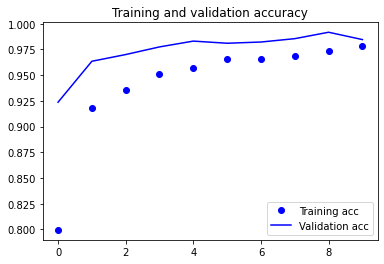

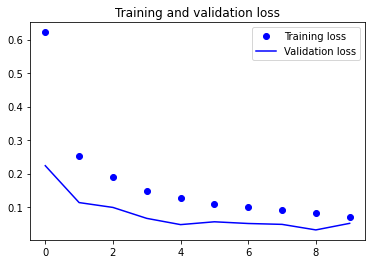

In [43]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## **7. FineTunning** 

In [44]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'conv5_block3_2_conv':
        set_trainable = True

    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [45]:
print('conv_base를 일부 frozen한 뒤 훈련되는 가중치의 종류수:', 
      len(model.trainable_weights))

conv_base를 일부 frozen한 뒤 훈련되는 가중치의 종류수: 11


In [46]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [47]:
history = model.fit(
      train_generator,  # X, Y
      steps_per_epoch = trainIMG_NUM/BATCH_SIZE, #2000 -> Train(cats+dogs) 이미지의 갯수
      batch_size = BATCH_SIZE,
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=validIMG_NUM/BATCH_SIZE)

Epoch 1/10
156/156 [==============================] - 77s 465ms/step - loss: 0.1043 - acc: 0.9654 - val_loss: 0.0448 - val_acc: 0.9860
Epoch 2/10
156/156 [==============================] - 74s 469ms/step - loss: 0.0864 - acc: 0.9718 - val_loss: 0.0299 - val_acc: 0.9905
Epoch 3/10
156/156 [==============================] - 71s 451ms/step - loss: 0.0755 - acc: 0.9742 - val_loss: 0.0296 - val_acc: 0.9902
Epoch 4/10
156/156 [==============================] - 73s 463ms/step - loss: 0.0647 - acc: 0.9801 - val_loss: 0.0228 - val_acc: 0.9929
Epoch 5/10
156/156 [==============================] - 72s 460ms/step - loss: 0.0506 - acc: 0.9829 - val_loss: 0.0210 - val_acc: 0.9947
Epoch 6/10
156/156 [==============================] - 70s 448ms/step - loss: 0.0560 - acc: 0.9816 - val_loss: 0.0253 - val_acc: 0.9923
Epoch 7/10
156/156 [==============================] - 73s 468ms/step - loss: 0.0493 - acc: 0.9841 - val_loss: 0.0173 - val_acc: 0.9938
Epoch 8/10
156/156 [==============================] - 7